# Project 2: Choosing a Model for Predicting on Unseen Data

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Yujia Sun

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P2.ipynb**, then zip it and upload to Canvas

### Package usage
You <span style="color:red">**cannot**</span> use python machine learning package that can have the k-fold validation algorithm as embedded function, for instance, **sklearn** package.

# Project Description

For Project 2 you will create a regression program and choose a model to predict the women’s Olympic 100-meter race record time for year **2024**. We will code the year of each race as we did in lecture 2.3. 

![caption](https://nianyil.people.clemson.edu/CPSC_4430/P2.jpg)


## Data File

A text file with the data is available on Canvas for the years 1928 through 2008 when the Olympics were held. The first line of the text file indicating there’re **m** lines of data and a **n** number of features (in this case, one). You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.

In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import numpy as np
import matplotlib.pyplot as plt


race_data=np.loadtxt('W100MTimes.txt', skiprows=1)
#print(race_data)


##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Pick the Best Model

Your project assignment is to compare four different models, linear, quadratic, cubic, and fourth. 

- $h_w(x) = w_0 + w_1x$
- $h_w(x) = w_0 + w_1x + w_2x^2$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$


In [2]:
##############################################################################
#                 TODO: Define the regression models                         #
##############################################################################

##############################Linear Model####################################
import numpy as np

def linear(data):
    # Number of sample
    n = data.shape[0]

    # Generate features matrix
    year = data[:,0].reshape(-1,1)
    X = np.concatenate((np.ones_like(year),year), axis=1)

    # Generate target matrix
    y = data[:,1].reshape(-1,1)

    # Calculate weights w0 and w1 
    # 𝑤 = (𝑋𝑇 * 𝑋)−1 * 𝑋 * 𝑇𝑦
    A = np.linalg.pinv(np.dot(X.T, X))
    B = np.dot(X.T, y)
    w = np.dot(A, B)

    # Calculate J
    # 𝐽(𝑤0,𝑤1) = (1/𝑚)*(𝑋𝑤−𝑦)𝑇(𝑋𝑤−𝑦)
    loss_temp = np.dot(X, w) - y
    J = (1/n) * np.dot(loss_temp.T, loss_temp)

    return w,J

w,J = linear(race_data)

# print(w)
# print(J)

#############################Quadratic Model#################################

def quadratic(data):
    # Number of sample
    n = data.shape[0]

    # Generate features matrix
    year = data[:,0].reshape(-1,1)
    X = np.concatenate((np.ones_like(year),year,year**2), axis=1)
    
    # Generate target matrix
    y = data[:,1].reshape(-1,1)

    # Calculate weights w0 and w1 
    # 𝑤 = (𝑋𝑇 * 𝑋)−1 * 𝑋 * 𝑇𝑦
    A = np.linalg.pinv(np.dot(X.T, X))
    B = np.dot(X.T, y)
    w = np.dot(A, B)

    # Calculate J
    # 𝐽(𝑤0,𝑤1) = (1/𝑚)*(𝑋𝑤−𝑦)𝑇(𝑋𝑤−𝑦)
    loss_temp = np.dot(X, w) - y
    J = (1/n) * np.dot(loss_temp.T, loss_temp)

    return w,J

w,J = quadratic(race_data)

# print(w)
# print(J)

##############################Cubic Model#####################################

def cubic(data):
    # Number of sample
    n = data.shape[0]

    # Generate features matrix
    year = data[:,0].reshape(-1,1)
    X = np.concatenate((np.ones_like(year),year,year**2,year**3), axis=1)
    
    # Generate target matrix
    y = data[:,1].reshape(-1,1)

    # Calculate weights w0 and w1 
    # 𝑤 = (𝑋𝑇 * 𝑋)−1 * 𝑋 * 𝑇𝑦
    A = np.linalg.pinv(np.dot(X.T, X))
    B = np.dot(X.T, y)
    w = np.dot(A, B)

    # Calculate J
    # 𝐽(𝑤0,𝑤1) = (1/𝑚)*(𝑋𝑤−𝑦)𝑇(𝑋𝑤−𝑦)
    loss_temp = np.dot(X, w) - y
    J = (1/n) * np.dot(loss_temp.T, loss_temp)

    return w,J

w,J = cubic(race_data)

# print(w)
# print(J)


# ##############################Fourth Model####################################

def fourth(data):
    # Number of sample
    n = data.shape[0]

    # Generate features matrix
    year = data[:,0].reshape(-1,1)
    X = np.concatenate((np.ones_like(year),year,year**2,year**3,year**4), axis=1)
    
    # Generate target matrix
    y = data[:,1].reshape(-1,1)

    # Calculate weights w0 and w1 
    # 𝑤 = (𝑋𝑇 * 𝑋)−1 * 𝑋 * 𝑇𝑦
    A = np.linalg.pinv(np.dot(X.T, X))
    B = np.dot(X.T, y)
    w = np.dot(A, B)

    # Calculate J
    # 𝐽(𝑤0,𝑤1) = (1/𝑚)*(𝑋𝑤−𝑦)𝑇(𝑋𝑤−𝑦)
    loss_temp = np.dot(X, w) - y
    J = (1/n) * np.dot(loss_temp.T, loss_temp)

    return w,J

w,J = fourth(race_data)

# print(w)
# print(J)


##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, you need to use <span style="color:red">**5-fold cross validation**</span> to pick out the best model for the prediction. You should present a chart of the error function $J$, similar to the one in the lecture (see below). You may need to use package like "**tabulate**" to print out the table.

```
                     Linear    Quadratic    Cubic    Fourth
-----------------  --------  -----------  -------  --------
1234                  10.25        24.25    12.25     23.25
5                     10.25        19.25    14.25     23.25
1235                  10.25        15.25    19.25     23.25
4                     10.25        10.25    20.25     23.25
1245                  10.25        24.25    12.25     23.25
3                     10.25        19.25    14.25     23.25
1345                  10.25        24.25    12.25     23.25
2                     10.25        19.25    14.25     23.25
2345                  10.25        24.25    12.25     23.25
1                     10.25        19.25    14.25     23.25
Mean for Training      0            0        0         0
Mean for Testing       0            0        0         0
```

You need to **plot** your training and testing $J$ with respect to the polynomial degree, similar to the one in the lecture.

In [3]:
##############################################################################
#                     TODO: 5-fold cross-validation                         #
##############################################################################

# Split a dataset into k folds
def cross_validation_split(data, folds=5):

    dataset_split = []
    data_copy = data
    size_fold = np.floor(data.shape[0] / folds)
    
    for i in range(folds):
        fold = []
        while len(fold) < size_fold:
            # Random catch a index
            index = np.random.randint(data_copy.shape[0], size = 1)
            # Append the related sample to the fold
            fold.append(data_copy[index,:])
            # Delete the selected sample
            data_copy = np.delete(data_copy, index, axis = 0)
            
        dataset_split.append(np.array(fold).reshape(-1,2))
    return dataset_split


# Define the loss function
def loss_func(feature, w, y):
    
    # Generate X for linear, qua, cubic, etc.
    X_pre = feature**0
    for i in range(w.size-1):
        X_pre = np.concatenate((X_pre,feature**(i+1)), axis=1)
    
    loss_temp = np.dot(X_pre, w) - y
    J = (1/(y.size))*np.dot(loss_temp.T, loss_temp)
    # Return predict
    return J

# Using the cross_validation_split function
def kfold_cv(data, folds, model):
    
    train_score = []
    valid_score = []
    split_data = cross_validation_split(data, folds)
    
    # Determine training and test sets
    for i in range(folds):
        
        fold_index = list(range(folds))#0,1,2,3,4...folds
        fold_index.pop(i)
        
        valid_set = split_data[i]# the popped data in the fold
        train_set = split_data[fold_index[0]]# 1st set of the data in the fold
        
       
        for j in fold_index[1:]:
            train_set = np.concatenate((train_set, split_data[j]), axis=0)#1st + the rest sets of data = trainnig data
            
        # Apply the selected model
        if model == "linear":
            w, train_loss = linear(train_set)
        elif model == "quadratic":
            w, train_loss = quadratic(train_set)
        elif model == "cubic":
            w, train_loss = cubic(train_set)
        elif model == "fourth":
            w, train_loss = fourth(train_set)
            
            
        train_score.append(np.squeeze(train_loss))
        train_score_avg = np.mean(train_score)
        
        valid_score.append(np.squeeze(loss_func(valid_set[:,0].reshape(-1,1), w, valid_set[:,1].reshape(-1,1))))
        valid_score_avg = np.mean(valid_score)
        
    return train_score_avg, valid_score_avg, train_score, valid_score

lin_train_score, lin_valid_score, lin_train_score_all, lin_valid_score_all = kfold_cv(race_data, 5, "linear")
#print(linear_train_score, linear_valid_score, linear_train_score_all, linear_valid_score_all)

quad_train_score, quad_valid_score, quad_train_score_all, quad_valid_score_all = kfold_cv(race_data, 5, "quadratic")
#print(quadratic_train_score, quadratic_valid_score, quadratic_train_score_all, quadratic_valid_score_all)

cubic_train_score, cubic_valid_score, cubic_train_score_all, cubic_valid_score_all = kfold_cv(race_data, 5, "cubic")
#print(cubic_train_score, cubic_valid_score, cubic_train_score_all, cubic_valid_score_all)

fourth_train_score, fourth_valid_score, fourth_train_score_all, fourth_valid_score_all = kfold_cv(race_data, 5, "fourth")
#print(fourth_train_score, fourth_valid_score, fourth_train_score_all, fourth_valid_score_all)



##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [4]:
##############################################################################
#                     TODO: Print out the table chart                       #
##############################################################################
from tabulate import tabulate

headers = ['', 'Linear', 'Quadratic', 'Cubic', 'Fourth']
table = [('1234', lin_train_score_all[0],quad_train_score_all[0],cubic_train_score_all[0],fourth_train_score_all[0]), 
         ('5', lin_valid_score_all[0],quad_valid_score_all[0],cubic_valid_score_all[0],fourth_valid_score_all[0]),
         ('1235', lin_train_score_all[1],quad_train_score_all[1],cubic_train_score_all[1],fourth_train_score_all[1]),
         ('4', lin_valid_score_all[1],quad_valid_score_all[1],cubic_valid_score_all[1],fourth_valid_score_all[1]),
         ('1245', lin_train_score_all[2],quad_valid_score_all[2],cubic_valid_score_all[2],fourth_valid_score_all[2]),
         ('3', lin_valid_score_all[2],quad_valid_score_all[2],cubic_valid_score_all[2],fourth_valid_score_all[2]),
         ('1345', lin_train_score_all[3],quad_train_score_all[3],cubic_train_score_all[3],fourth_train_score_all[3]),
         ('2', lin_valid_score_all[3],quad_valid_score_all[3],cubic_valid_score_all[3],fourth_valid_score_all[3]),
         ('2345', lin_train_score_all[4],quad_train_score_all[4],cubic_train_score_all[4],fourth_train_score_all[4]),
         ('1', lin_valid_score_all[4],quad_valid_score_all[4],cubic_valid_score_all[4],fourth_valid_score_all[4]),
         ('Mean of Training', lin_train_score,quad_train_score,cubic_train_score,fourth_train_score),
         ('Mean of Testing', lin_valid_score,quad_valid_score,cubic_valid_score,fourth_valid_score),
        ]

print(tabulate(table, headers, tablefmt="simple"))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

                      Linear    Quadratic      Cubic       Fourth
----------------  ----------  -----------  ---------  -----------
1234              0.0690759     0.045717   0.0324676   2.0829
5                 0.00850666    0.0053903  0.0576622  13.0885
1235              0.043474      0.0237289  0.0391627   0.0665434
4                 0.134831      0.102694   0.0150371   0.12467
1245              0.0465638     0.0737386  0.0692098   0.0564668
3                 0.127869      0.0737386  0.0692098   0.0564668
1345              0.0592717     0.0446118  0.0281025   0.0854384
2                 0.0550211     0.0100048  0.104452    0.00959423
2345              0.0527435     0.0310486  0.0282524   0.0773363
1                 0.0808339     0.0694533  0.0720796   0.0614689
Mean of Training  0.0542258     0.0359253  0.0312864   0.477472
Mean of Testing   0.0814124     0.0522562  0.0636882   2.66814


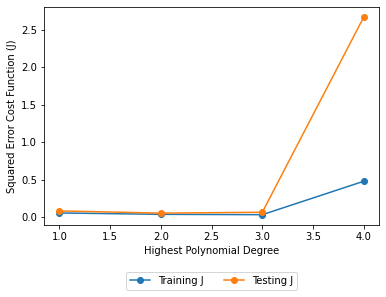

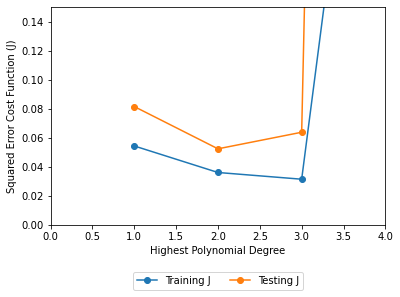

In [5]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
#Plot the J curve
x = np.array([1,2,3,4])

y_train = np.array([lin_train_score, quad_train_score,cubic_train_score,fourth_train_score])
y_test = np.array([lin_valid_score,quad_valid_score,cubic_valid_score,fourth_valid_score])


plt.plot(x,y_train,marker='o',label='Training J')
plt.plot(x,y_test,marker='o',label='Testing J')

plt.xlabel('Highest Polynomial Degree')
plt.ylabel('Squared Error Cost Function (J)')

plt.legend(loc=8,ncol=4,bbox_to_anchor=(0.5,-0.3),borderaxespad=0)
plt.show()

plt.xlim((0, 4))  
plt.ylim((0, 0.15))  
plt.plot(x,y_train,marker='o',label='Training J')
plt.plot(x,y_test,marker='o',label='Testing J')

plt.xlabel('Highest Polynomial Degree')
plt.ylabel('Squared Error Cost Function (J)')

plt.legend(loc=8,ncol=4,bbox_to_anchor=(0.5,-0.3),borderaxespad=0)
plt.show()



##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss **which model is the best** for the record time prediction.

**Your Answer:**  
Because we have very a few data, the smallest training J and testing J can be different each I calculate.
Thus the result of the best model sometimes is quadratic, sometimes is cubic.

The below image is the result I got. While the polynomial degree is 1(linear model), the testing score is higher than the train score, the model is a little bit underfitting. Same as while the polynomial degree is 2(quadratic model). The best model is Cubic, because it has the lowest training J and testing J among all the models.

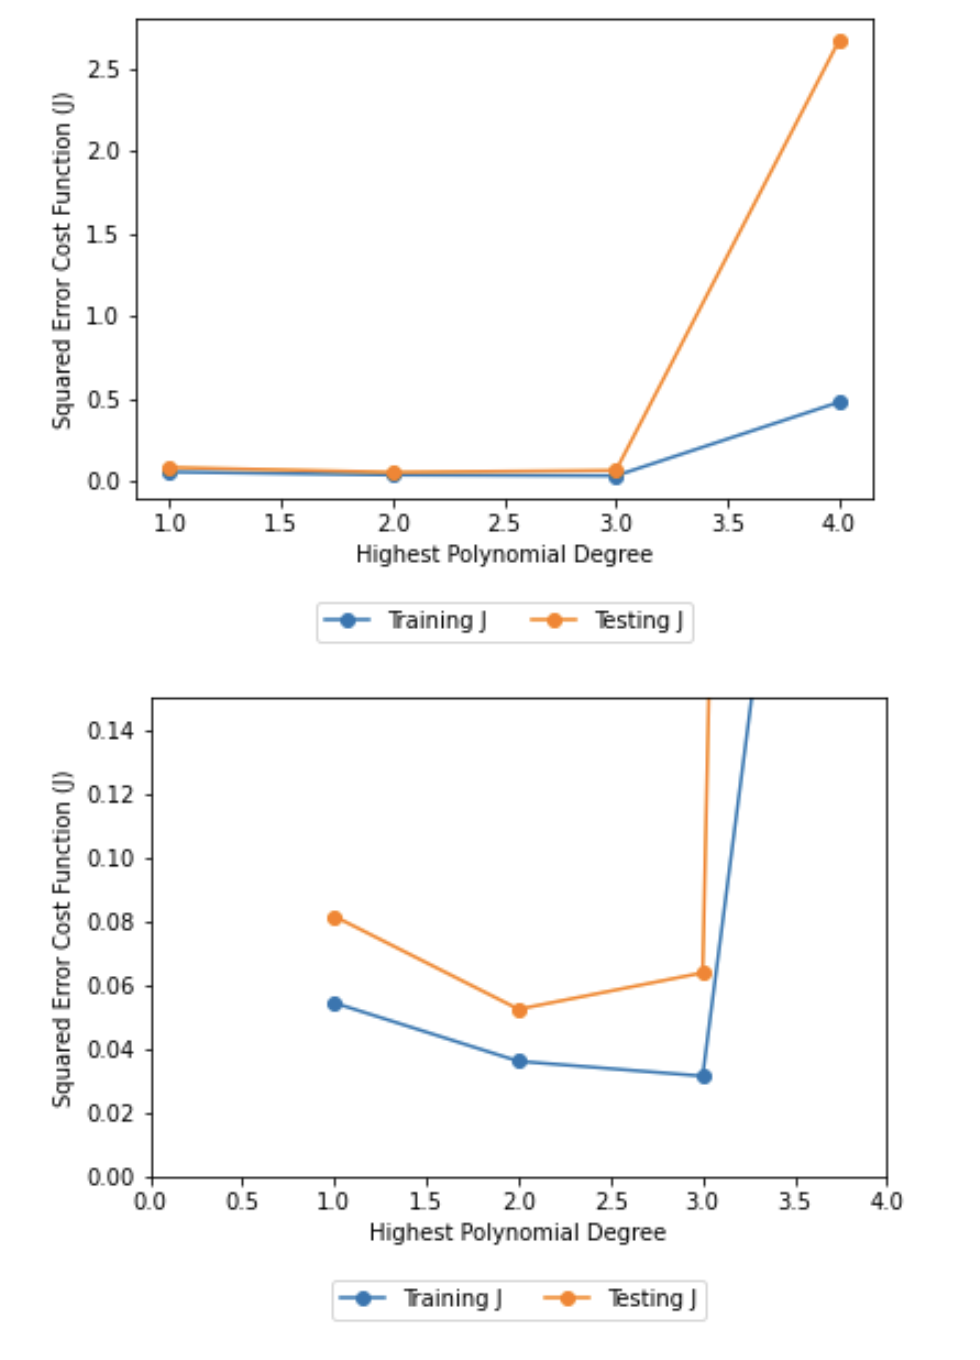

In [6]:
from IPython.display import Image
Image(filename = "cubic.png", width=420, height=380)


Next, compute the final weights of the best model utilizing the **complete data set**

In [7]:
##############################################################################
#              TODO: Calculate the final regression model                    #
##############################################################################

# For this time, I got cubic as the best model:

w_final, J_final = cubic(race_data)
print("The final weights are:\n",str(w_final))
print("The final J is:\n",str(J_final))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

The final weights are:
 [[ 1.25156211e+01]
 [-1.02228993e-02]
 [-3.22216651e-04]
 [ 2.59520640e-06]]
The final J is:
 [[0.03434737]]


## Prediction Using the Best Model

Write a Python program that takes a **year** as input, then outputs the winning women’s Olympic 100-meter **race time** for that year (round to two decimal places). You need to try and print out the results of **at least three different years**, and the final trial should output the race time of **2024**.

In [8]:
##############################################################################
#         TODO: Predict the race time using the best model                   #
##############################################################################
def predict(year, w):
    
    year = np.array([[year-1900]])

    X_pre = year**0
    for i in range(w.size-1):
        X_pre = np.concatenate((X_pre,year**(i+1)), axis=1)
    
    # Return predict
    return round(float(np.dot(X_pre, w)),2)

print("We can predict that:")
print("The Women’s Olympic 100m time for 2022 will be",str(predict(2022, w_final)),"seconds")
print("The Women’s Olympic 100m time for 2023 will be",str(predict(2023, w_final)),"seconds")
print("The Women’s Olympic 100m time for 2024 will be",str(predict(2024, w_final)),"seconds")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

We can predict that:
The Women’s Olympic 100m time for 2022 will be 11.19 seconds
The Women’s Olympic 100m time for 2023 will be 11.21 seconds
The Women’s Olympic 100m time for 2024 will be 11.24 seconds
